# Lesson 24 - Grouping and Aggregation

### The following topics are discussed in this notebook:
* Sorting Pandas DataFrames
* Grouping and Aggregation Operations

## Sorting, Grouping, and Aggregating in Pandas

In the previous lesson, we learned how to create Pandas DataFrames, how to access information stored within a DataFrame, and how to perform filtering operations on the rows of a DataFrame. In this lesson we will learn how to sort rows of a DataFrame according to specific columns, as well as how to performing grouping and aggregation operations. 

We begin by importing a few packages. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gapminder Dataset

To illustrate the concepts covered in this lesson, we will make use of the Gapminder Dataset. This dataset contains socioeconomic information for 184 countries for each year since 1800. We have 219 years worth of information for each of the 184 countries, and so the dataset contains 40,296 rows. The dataset contains the following seven columns:

* **country** - This column contains the names of the countries.
* **year** - Entries in this column provide the the year during which that particular record was collected. 
* **continent** - The provides the name of one of four continental regions to which the country has been assigned. The regions are `africa`, `americas`, `asia`, and `europe`. 
* **population** - Each entry in this column provides the population of the associated country in the relevant year. 
* **life_exp** - This column provides the average life expectancy in a given country in a given year. 
* **gdp_per_cap** - This column provides the per capita GDP of a given country in a given year, measured in US Dollars. GDP is a measure of the economic output of a country. The per capita GDP is the total GDP of the country divided by the population. 
* **gini** - Each entry in this column provides the Gini index for a particular country in a particular year. The Gini index is a measure of economic inequality. The scale ranges from 0 to 100, which larger values indicating a higher level of inequality. 

In the cell below, we load the dataset into a DataFrame, and view 10 randomly selected rows. 

In [2]:
gm = pd.read_csv('gapminder_data.txt', sep='\t')
gm.sample(n=10, random_state=1)

,country,year,continent,population,life_exp,gdp_per_cap,gini
1580,Mongolia,1808,asia,619000,31.8,593,32.0
20480,Finland,1911,europe,2960000,48.6,3250,36.2
31793,Slovenia,1972,europe,1690000,68.5,14300,33.1
45,Denmark,1800,europe,1060000,37.4,2010,37.2
33207,Kyrgyz Republic,1980,asia,3610000,63.9,3540,31.2
33111,United States,1979,americas,228000000,73.7,30000,34.6
21362,Bhutan,1916,asia,148000,33.0,762,40.9
36288,Cote d Ivoire,1997,africa,15400000,52.8,3050,39.7
2788,Cameroon,1815,africa,1860000,28.8,627,41.9
11061,Botswana,1860,africa,121000,33.6,483,47.0


We can use the `describe()` method to get obtain statistical summaries of each of the numerical columns. 

In [3]:
gm.describe()

,year,population,life_exp,gdp_per_cap,gini
count,40296.00000,4.029600e+04,40296.000000,40296.000000,40296.000000
mean,1909.00000,1.375962e+07,43.031052,4585.009033,40.054174
std,63.21998,6.616676e+07,16.246992,10176.578866,9.176664
min,1800.00000,2.130000e+03,1.000000,247.000000,16.000000
25%,1854.00000,4.190000e+05,31.100000,875.000000,34.000000
50%,1909.00000,2.000000e+06,35.500000,1440.000000,40.000000
75%,1964.00000,6.540000e+06,55.600000,3460.000000,45.000000
max,2018.00000,1.420000e+09,84.200000,178000.000000,79.900000


## Add new columns

We will start by adding two new columns, `total_gdp`, and `total_life_exp`. Entries in the column `total_gdp` will record the total GDP of a specific country in a given year, and will be calculated by multiplying `population` and `gdp_per_cap`. Similarly, entries in `total_life_exp` will be calculated by multiplying `population` by `life_exp`. This column can be viewed as an estimate of the total number of years that people living in the country at that time would be collectively expected to live. 

In [4]:
gm.loc[:,'total_gdp'] = gm.loc[:,'population'] * gm.loc[:,'gdp_per_cap']
gm.loc[:,'total_life_exp'] = gm.loc[:,'population'] * gm.loc[:,'life_exp']
gm.head()

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
0,Afghanistan,1800,asia,3280000,28.2,603,30.5,1977840000,92496000.0
1,Albania,1800,europe,410000,35.4,667,38.9,273470000,14514000.0
2,Algeria,1800,africa,2500000,28.8,715,56.2,1787500000,72000000.0
3,Angola,1800,africa,1570000,27.0,618,57.2,970260000,42390000.0
4,Antigua and Barbuda,1800,americas,37000,33.5,757,40.0,28009000,1239500.0


## Filtering 2018 Data 

For now, we will focus only on 2018 data. We will apply a filtering operation to extra only the 184 rows associated with 2018. 

In [5]:
gm_2018 = gm.loc[gm.year == 2018, :]
print(len(gm_2018))

184


## Sorting

We can use the DataFrame method `sort_values` to sort the records in a DataFrame according to a particular column. This method has one required parameter named `by`, which is used to specify the column by which the sorting is to be performed. 

We will sort by Gini index to find the 10 countries with the least amount of income inequality in 2018.

In [6]:
gm_2018.sort_values(by='gini').head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40284,Ukraine,2018,europe,44000000,72.3,8330,25.0,366520000000,3.181200e+09
40257,Slovenia,2018,europe,2080000,81.1,30900,25.4,64272000000,1.686880e+08
40156,Czech Republic,2018,europe,10600000,79.4,32300,25.9,342380000000,8.416400e+08
40219,Moldova,2018,europe,4040000,72.4,5330,26.4,21533200000,2.924960e+08
40256,Slovak Republic,2018,europe,5450000,77.2,31400,26.5,171130000000,4.207400e+08
40199,Kyrgyz Republic,2018,asia,6130000,71.5,3490,26.8,21393700000,4.382950e+08
40195,Kazakhstan,2018,asia,18400000,72.0,24200,26.9,445280000000,1.324800e+09
40126,Belarus,2018,europe,9450000,73.8,17200,27.0,162540000000,6.974100e+08
40168,Finland,2018,europe,5540000,82.1,40300,27.1,223262000000,4.548340e+08
40233,Norway,2018,europe,5350000,82.4,64800,27.5,346680000000,4.408400e+08


We can set the optional parameter `ascending` to be equal to `False` to sort a DataFrame in descending order according to a column. By default, this parameter is set to `True`. In the cell below, we will sort by Gini index in descending order to identify the 10 countries with the greatest levels of income inequality in 2018. 

In [7]:
gm_2018.sort_values(by='gini', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40260,South Africa,2018,africa,57400000,63.5,12300,63.0,706020000000,3.644900e+09
40268,Suriname,2018,americas,568000,71.6,13200,61.0,7497600000,4.066880e+07
40133,Botswana,2018,africa,2330000,66.9,16500,60.5,38445000000,1.558770e+08
40225,Namibia,2018,africa,2590000,65.7,10500,59.1,27195000000,1.701630e+08
40294,Zambia,2018,africa,17600000,59.5,3860,57.1,67936000000,1.047200e+09
40143,Central African Republic,2018,africa,4740000,51.6,689,56.2,3265860000,2.445840e+08
40203,Lesotho,2018,africa,2260000,51.1,2960,54.2,6689600000,1.154860e+08
40223,Mozambique,2018,africa,30500000,61.1,1200,54.0,36600000000,1.863550e+09
40128,Belize,2018,americas,382000,72.5,7710,53.3,2945220000,2.769500e+07
40269,Swaziland,2018,africa,1390000,58.6,7600,51.5,10564000000,8.145400e+07


We will now use a sorting operation to find the 10 countries with the lowest life expectancy in 2018.

In [8]:
gm_2018.sort_values(by='life_exp').head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40203,Lesotho,2018,africa,2260000,51.1,2960,54.2,6689600000,1.154860e+08
40143,Central African Republic,2018,africa,4740000,51.6,689,56.2,3265860000,2.445840e+08
40259,Somalia,2018,africa,15200000,58.0,629,48.0,9560800000,8.816000e+08
40269,Swaziland,2018,africa,1390000,58.6,7600,51.5,10564000000,8.145400e+07
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8,68068000000,2.136680e+09
40294,Zambia,2018,africa,17600000,59.5,3860,57.1,67936000000,1.047200e+09
40179,Guinea-Bissau,2018,africa,1910000,59.7,1550,50.7,2960500000,1.140270e+08
40254,Sierra Leone,2018,africa,7720000,60.0,1490,34.0,11502800000,4.632000e+08
40295,Zimbabwe,2018,africa,16900000,60.2,1950,43.2,32955000000,1.017380e+09
40144,Chad,2018,africa,15400000,60.5,1860,43.3,28644000000,9.317000e+08


In the cell below, we use sorting to find the 10 countries with the highest life expectancy in 2018.

In [9]:
gm_2018.sort_values(by='life_exp', ascending=False).head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini,total_gdp,total_life_exp
40193,Japan,2018,asia,127000000,84.2,39100,32.1,4965700000000,1.069340e+10
40255,Singapore,2018,asia,5790000,84.0,83900,40.9,485781000000,4.863600e+08
40271,Switzerland,2018,europe,8540000,83.5,57100,32.3,487634000000,7.130900e+08
40263,Spain,2018,europe,46400000,83.2,34700,36.2,1610080000000,3.860480e+09
40119,Australia,2018,asia,24800000,82.9,45800,32.3,1135840000000,2.055920e+09
40191,Italy,2018,europe,59300000,82.6,35200,35.4,2087360000000,4.898180e+09
40184,Iceland,2018,europe,338000,82.6,47400,27.8,16021200000,2.791880e+07
40169,France,2018,europe,65200000,82.6,39000,32.7,2542800000000,5.385520e+09
40233,Norway,2018,europe,5350000,82.4,64800,27.5,346680000000,4.408400e+08
40207,Luxembourg,2018,europe,590000,82.4,99000,33.8,58410000000,4.861600e+07


## Relationship Between Life Expectancy and Income Inequality

In the cell below, we create a scatter plot to explore the relationship between life expectancy and income inequality, as measured by the Gini index. 

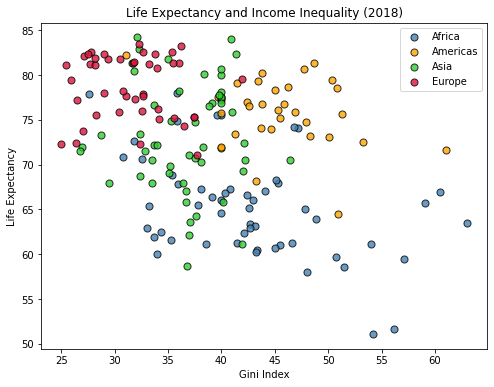

In [10]:
continent_list = ['africa', 'americas', 'asia', 'europe']
colors = ['steelblue', 'orange', 'limegreen', 'crimson']
plt.figure(figsize = [8,6])
for i, c in enumerate(continent_list):
    plt.scatter(gm_2018.loc[gm_2018.continent == c,'gini'], 
                gm_2018.loc[gm_2018.continent == c,'life_exp'],
                s=50, edgecolor='k', alpha=0.8, label=c.title(),
                color=colors[i])

plt.xlabel('Gini Index')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy and Income Inequality (2018)')   
plt.legend()
plt.show()
    


It does appear as though there is some relationship between life expectancy and Gini index. Countries with lower levels of income inequality tend to also have a higher life expectancy. 

In the cell below, we separate the plot above into four subplots. Each subplot will provide information for countries within a single continental region.

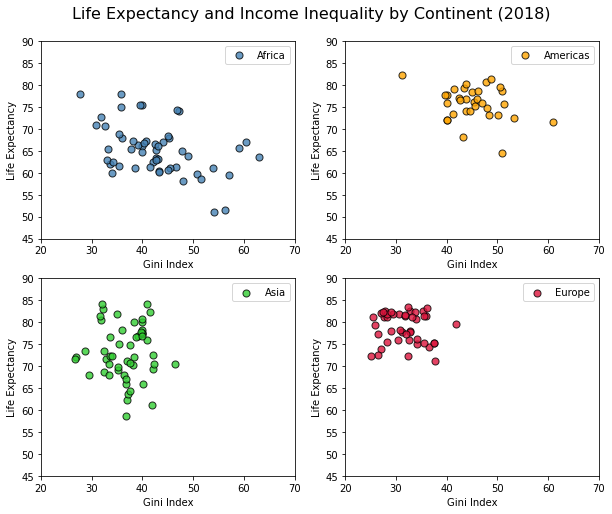

In [11]:
plt.figure(figsize = [10,8])
for i, c in enumerate(continent_list):  
    plt.subplot(2,2,i+1)
    plt.scatter(gm_2018.loc[gm_2018.continent == c,'gini'], 
                gm_2018.loc[gm_2018.continent == c,'life_exp'],
                s=50, edgecolor='k', alpha=0.8, label=c.title(),
                color=colors[i])
    plt.xlim([20,70])
    plt.ylim([45,90])
    plt.xlabel('Gini Index')
    plt.ylabel('Life Expectancy')
    plt.legend()
plt.suptitle('Life Expectancy and Income Inequality by Continent (2018)', fontsize=16, y=0.94)
plt.show()

## Global Per Capita GDP in 2018

We will now calculate the global per capita GDP in 2018. We wil do this by first using the `sum()` method to calculate the global population and global GDP in 2018. We will then divide the GDP by the population to obtain the per capita GDP. 

In [12]:
total_pop_2018 = gm_2018.loc[:, 'population'].sum()
print(total_pop_2018)

7595200200


In [13]:
total_gdp_2018 = gm_2018.loc[:, 'total_gdp'].sum()
print(total_gdp_2018)

118225647770000


In [14]:
pcgdp_2018 = total_gdp_2018 / total_pop_2018
print(pcgdp_2018)

15565.836930802692


As we see, the global per capita GDP in 2018 is around $15,566 per person.

## Grouping: Per Capita GDP and Life Expectancy By Continent

We can combine the steps above with a filter opperation to calculate the per capita GDP of Africa in 2018. 

In [23]:
africa_gdp_2018 = gm_2018.loc[gm.loc[:, 'continent'] == 'africa',  #not sure why we boolean masked with the original dataframe
                              'total_gdp'].sum()                   #this df is 40k elements large and the T/F values shouldn't
africa_pop_2018 = gm_2018.loc[gm.loc[:, 'continent'] == 'africa',  #line up intelligently. yet the same $4699 answer is achieved
                              'population'].sum()
africa_pcgdp_2018 = africa_gdp_2018 / africa_pop_2018
print(africa_pcgdp_2018)

4699.924927176331


We could repeat this process for each of the four continental regions. However, Pandas DataFrames come equipped with a `groupby()` method that can be used to calculate aggregate results for groups determined by the values in a particular column. Each call to `groupby()` must specific one or more columns by which to group, and must be immediately followed by an aggregation that is to be performed on the individual groups. 

In the cells that follow, we will now use grouping operations to calcuate the per capita GDP and life expectancy for each continental region in 2018. We will start by finding the total population, total GDP, and population weighted life expectancy of each continent.

In [16]:
grouped = gm_2018.loc[:,['continent','population',
                         'total_gdp', 'total_life_exp']
                     ].groupby('continent').sum()
grouped

,population,total_gdp,total_life_exp
continent,,,
africa,1287150200,6049509310000,8.477140e+10
americas,1010978000,29023263900000,7.840079e+10
asia,4455113000,56602608160000,3.261415e+11
europe,841959000,26550266400000,6.600596e+10


We will now caluclate per capita GDP and life expectancy of each continent, adding these columns to the `grouped` DataFrame.

In [17]:
grouped.loc[:,'pc_gdp'] = grouped.loc[:,'total_gdp'] / grouped.loc[:,'population']
grouped.loc[:,'life_exp'] = grouped.loc[:,'total_life_exp'] / grouped.loc[:,'population']
grouped.loc[:,['pc_gdp', 'life_exp']]

,pc_gdp,life_exp
continent,,
africa,4699.924927,65.859754
americas,28708.106309,77.549455
asia,12705.089222,73.206120
europe,31533.918397,78.395693


We could perform the calculate above by starting with the original DataFrame, and chaining together operations without storing any intermediate DataFrames to variables.

In [18]:
gm.loc[gm.year == 2018, 
       ['continent', 'population', 'total_gdp', 'total_life_exp']].\
    groupby('continent').sum().\
    assign(pcgdp = lambda df : df.total_gdp / df.population).\
    assign(life_exp = lambda df : df.total_life_exp / df.population).\
    loc[:,['pcgdp','life_exp']]

,pcgdp,life_exp
continent,,
africa,4699.924927,65.859754
americas,28708.106309,77.549455
asia,12705.089222,73.206120
europe,31533.918397,78.395693


## Grouping by Multiple Columns

We can group DataFrames by more than one column. In the cell below, we group by both `continent` and `year` to create a DataFrame that reports the total population and total gdp for each continental region in each year. We display 10 randomly selected rows from this DataFrame.

In [19]:
gm.loc[:, ['continent', 'year', 'population', 'total_gdp']].\
    groupby(['continent', 'year']).sum().sample(n=10, random_state=1)

population       total_gdp
continent year                            
asia      1885   815254830    872167246500
europe    1876   345972300    987125787000
africa    1980   479333200   1832906735000
          1985   551935800   1953737720000
americas  2016   992670000  27778433960000
africa    1834    80557300     57184299900
          1873   102497200     86576363600
          1859    93708300     73286763400
europe    1869   328165400    861548480000
africa    1802    73351000     48243936900

We get build off the the code in the previous cell to calculate the per capita gdp and life expectancy of each contintal region during each year. This code uses the `assign()` DataFrame method to add the columns `pcgdp` and `life_exp` to the DataFrame. You can read more about that method here: [pandas.DataFrame.assign()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html)

In [20]:
gm_yc =\
    gm.loc[:, ['continent', 'year', 'population', 'total_gdp', 'total_life_exp']].\
    groupby(['continent', 'year']).sum().\
    assign(pcgdp = lambda df : df.total_gdp / df.population).\
    assign(life_exp = lambda df : df.total_life_exp / df.population).\
    filter(['pcgdp', 'life_exp'])

gm_yc.sample(n=10, random_state=1)

pcgdp   life_exp
continent year                         
asia      1885   1069.809358  29.506632
europe    1876   2853.193123  36.950081
africa    1980   3823.867687  54.694975
          1985   3539.791621  55.976064
americas  2016  27983.553406  77.181625
africa    1834    709.858696  30.261271
          1873    844.670524  30.439735
          1859    782.073342  30.305003
europe    1869   2625.348315  35.562925
africa    1802    657.713418  30.128411

We will now create plots to show how the per capita gdp and life expectancy have changed over time in each continental region. 

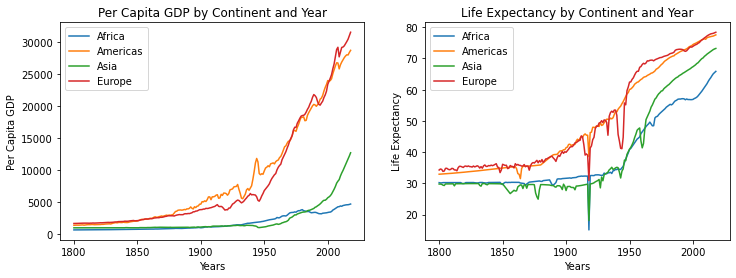

In [21]:
years = range(1800, 2019)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(years, gm_yc.loc['africa','pcgdp'], label='Africa')
plt.plot(years, gm_yc.loc['americas','pcgdp'], label='Americas')
plt.plot(years, gm_yc.loc['asia','pcgdp'], label='Asia')
plt.plot(years, gm_yc.loc['europe','pcgdp'], label='Europe')
plt.xlabel("Years")
plt.ylabel("Per Capita GDP")
plt.title("Per Capita GDP by Continent and Year")
plt.legend()
plt.subplot(1,2,2)
plt.plot(years, gm_yc.loc['africa','life_exp'], label='Africa')
plt.plot(years, gm_yc.loc['americas','life_exp'], label='Americas')
plt.plot(years, gm_yc.loc['asia','life_exp'], label='Asia')
plt.plot(years, gm_yc.loc['europe','life_exp'], label='Europe')
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Continent and Year")
plt.legend()
plt.show()